<h1> Task 1 </h1>

The file name starts with an 18 digit number, which is the UNIX time in nanoseconds. Using the python <blue><u>datetime</blue></u> library and <u>pytz</u>, convert this number to a python datetime object in both UTC and CERN local time.

In [75]:
from datetime import datetime
import pytz

file = "1541962108935000000_167_838.h5"

cern_time=pytz.timezone('Europe/Zurich')
unix_time=float(file[:18])/100000000

In [76]:
datetime_utc=datetime.utcfromtimestamp(unix_time)
print("The python datatime object in UTC is",datetime_utc)

The python datatime object in UTC is 2018-11-11 18:48:28.935000


In [77]:
datetime_cern=pytz.utc.localize(datetime_utc).astimezone(cern_time)
print("The python datatime object for Switzerland/CERN is",datetime_cern)

The python datatime object for Switzerland/CERN is 2018-11-11 19:48:28.935000+01:00


<h1> Task 2</h1><br>
Use the <u><blue>h5py</u></blue> library to open the hdf file. The file is organized as a directory tree with groups and datasets. Write a program which explores all branches of the directory tree and identifies all of the datasets in the file. Your program should create a csv file which records the names of all of the groups and datasets, and includes the size, shape and type of data in each dataset.

In [78]:
import h5py
import numpy as np
import pandas as pd
file = h5py.File("/Users/KajalPuri/Downloads/1541962108935000000_167_838.h5", 'r')
data={}

def explore(obj,branch):
    if(isinstance(branch,h5py.Dataset)):
        try:
            datatype=branch.dtype
        except Exception as e:
            datatype=str(e)
        data[obj]=['dataset', branch.size, branch.shape, datatype]
    else:
        data[obj]=['group',None,None,None]
file.visititems(explore)
dataframe = pd.DataFrame.from_dict(data,orient='index',columns=['type','size','shape','dtype'])
print(dataframe)
#dataframe.to_csv('/Users/KajalPuri/Downloads/data.csv', sep=',')

                                                       type  size  shape  \
AwakeEventData                                        group   NaN   None   
AwakeEventData/AIRTR01                                group   NaN   None   
AwakeEventData/AIRTR01/Acq                            group   NaN   None   
AwakeEventData/AIRTR01/Acq/numericPosition          dataset   1.0   (1,)   
AwakeEventData/AIRTR02                                group   NaN   None   
AwakeEventData/AIRTR02/Acq                            group   NaN   None   
AwakeEventData/AIRTR02/Acq/numericPosition          dataset   1.0   (1,)   
AwakeEventData/AWAKEInjPhaseShifter                   group   NaN   None   
AwakeEventData/AWAKEInjPhaseShifter/PhaseReadback     group   NaN   None   
AwakeEventData/AWAKEInjPhaseShifter/PhaseReadba...  dataset   1.0   (1,)   
AwakeEventData/BLMITT41                               group   NaN   None   
AwakeEventData/BLMITT41/Acquisition                   group   NaN   None   
AwakeEventDa

<h1> Task 3</h1><br>
In the hdf file, there is 2D image data stored as a 1D array in the dataset called "/AwakeEventData/XMPP-STREAK/StreakImage/streakImageData". The datasets "/AwakeEventData/XMPP-STREAK/StreakImage/streakImageHeight" and "/AwakeEventData/XMPP-STREAK/StreakImage/streakImageWidth" store information about the height and width of the image. Use numpy.reshape to convert the 1D array into a 2D image. Then, use scipy.signal.medfilt to filter the image. Finally, use matplotlib to display the image and save it as a png file.

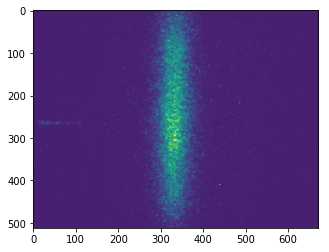

In [82]:
import matplotlib.pyplot as plt
from scipy.signal import medfilt 

image_data = 'AwakeEventData/XMPP-STREAK/StreakImage/streakImageData'
image_height = 'AwakeEventData/XMPP-STREAK/StreakImage/streakImageHeight'
image_width = 'AwakeEventData/XMPP-STREAK/StreakImage/streakImageWidth'

data = file[image_data][()].reshape(file[image_height][0], file[image_width][0])

final_img = medfilt(data)

plt.imshow(final_img)
plt.savefig("task3_image.png") 